# Exploratory Data Analysis
1. Check and remove duplicates if exists
2. Visualization for Numerical features, Categorical features, as well as Time & Event
3. Remove features with pariwise correlation >0.8
4. Output data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn_pandas import DataFrameMapper
import seaborn as sns
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799_new/brca_demo.csv')

In [ ]:
y = brca.iloc[:,2:4]
x = brca.iloc[:,4:]

In [ ]:
# summary statistics
brca.describe()

,status,time,age,number_of_lymph_nodes,lymph_node_examined_count,number_of_lymphnodes_positive_by_he,tumor_necrosis_percent,tumor_nuclei_percent,tumor_weight,A1BG,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,lymph_node_ratio,is_tnbc
count,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,...,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000,1079.000000
mean,0.139944,1260.448563,58.435403,2.285635,10.495273,2.285635,6.045412,77.731233,368.907507,194.378035,...,1111.095527,112.936587,892.823402,3933.510235,1231.421153,965.897018,194.794726,0.125682,0.172023,0.106580
std,0.347090,1190.548115,13.070034,4.343524,8.364758,4.343524,9.876832,10.743858,375.534207,202.099117,...,272.608139,106.243626,318.897770,2045.007442,509.513747,532.154420,314.544248,1.378702,0.257888,0.308722
min,0.000000,1.000000,26.000000,0.000000,0.000000,0.000000,0.000000,20.000000,31.000000,7.093500,...,374.169100,0.000000,230.035200,567.986000,272.951100,150.808800,0.615400,0.000000,0.000000,0.000000
25%,0.000000,464.500000,49.000000,0.000000,3.000000,0.000000,0.000000,70.000000,189.500000,87.360650,...,929.663800,38.380500,679.335300,2573.667050,882.142200,673.558700,24.599450,0.000000,0.000000,0.000000
50%,0.000000,860.000000,58.000000,1.000000,9.000000,1.000000,0.000000,75.000000,230.000000,142.449500,...,1087.610500,83.537300,848.145000,3514.283100,1148.165100,888.400000,61.010100,0.000000,0.055556,0.000000
75%,0.000000,1688.000000,67.000000,3.000000,15.000000,3.000000,8.000000,85.000000,421.000000,229.529650,...,1266.976400,155.294500,1064.437600,4829.812500,1514.824000,1147.881500,269.440300,0.000000,0.247619,0.000000
max,1.000000,8605.000000,90.000000,35.000000,44.000000,35.000000,30.000000,100.000000,2990.000000,2752.202000,...,2294.278900,900.610400,2449.850900,23934.233700,6456.047200,8174.370800,4832.410400,40.216100,1.000000,1.000000


In [ ]:
features = np.setdiff1d(brca.columns, ['status', 'time']).tolist()

In [ ]:
# Checking for null values
N_null = sum(brca[features].isnull().sum())
print("The brca contains {} null values".format(N_null)) #0 null values

# Removing duplicates if there exist
N_dupli = sum(brca.duplicated(keep='first'))
brca = brca.drop_duplicates(keep='first').reset_index(drop=True)
print("The dataset contains {} duplicates".format(N_dupli))

# Number of samples in the dataset
N = brca.shape[0]

The brca contains 0 null values
The dataset contains 0 duplicates


In [ ]:
categorical_features_idx = [4, 5, 6, 7, 9, 10, 11, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 20247, 20249]
numerical_features_idx = [8, 12, 13, 15, 27, 28, 29, 20248]
print(len(categorical_features_idx))
print(len(numerical_features_idx))
numerical_features_idx += list(range(30, 20247))

21
8


In [ ]:
# define numerical and categorical features
cat = brca.iloc[:,categorical_features_idx]
num = brca.iloc[:,numerical_features_idx]

In [ ]:
cat_cols = cat.columns
num_cols = num.columns

## Summary tables

In [ ]:
status = brca.iloc[:,2].replace({0: "Censored", 1: "Uncensored"})
time = brca.iloc[:,3]

In [ ]:
# Concatenate 'status', 'time', and categorical variables into one DataFrame
data = pd.concat([status, time] + [cat[col] for col in cat.columns], axis=1)

# Define a function to calculate both counts and percentages out of total
def calculate_counts_and_percentages(series):
    counts = series.value_counts()
    percentages = series.value_counts(normalize=True) * 100
    return counts, percentages

# Group by 'status' and apply the function to each categorical variable
cat_summary = data.groupby('status').agg({col: calculate_counts_and_percentages for col in cat.columns})

# Combine counts and percentages into a single DataFrame
result = pd.concat([cat_summary[col].apply(lambda x: x[0]) for col in cat.columns],
                   axis=1,
                   keys=[f'{col}' for col in cat.columns])

result_percentages = pd.concat([cat_summary[col].apply(lambda x: x[1]) for col in cat.columns],
                                axis=1,
                                keys=[f'{col}' for col in cat.columns])
result_combined = result

# Iterate over each column in the result DataFrame
for col in result_combined.columns.levels[0]:
    # Extract counts and percentages for the current column
    counts = result_combined[col]
    percentages = result_percentages[col]

    # Fill NaN values with 0 for both counts and percentages
    counts = counts.fillna(0)
    percentages = percentages.fillna(0)

    # Combine counts and percentages into a single column
    combined = counts.astype(str) + " (" + percentages.round(1).astype(str) + "%)"

    # Assign the combined column back to the result_combined DataFrame
    result_combined[col] = combined

# Calculate total participants
total_participants = len(data)

# Count occurrences of status values
status_0_count = (data['status'] == "Censored").sum()
status_1_count = (data['status'] == "Uncensored").sum()

# Calculate proportions
status_0_proportion = status_0_count / total_participants * 100  # Convert to percentage
status_1_proportion = status_1_count / total_participants * 100  # Convert to percentage

# Create counts and percentages for display
censored_display = f"{status_0_count} ({status_0_proportion:.1f}%)"
uncensored_display = f"{status_1_count} ({status_1_proportion:.1f}%)"

# Create a DataFrame with formatted counts and percentages
df = pd.DataFrame({
    'Censored': [censored_display],
    'Uncensored': [uncensored_display]
})
dft = df.T
dft.rename(columns={0: ''}, inplace=True)

dft.columns = pd.MultiIndex.from_product([['No. of participants'], dft.columns])

# Convert the second level of the column MultiIndex to strings
result_combined.columns = result_combined.columns.set_levels([str(level) for level in result_combined.columns.levels[1]], level=1)

# Create a sorted version of level 1 index
sorted_level1 = sorted(result_combined.columns.levels[1])

# Reindex the columns with the sorted level 1 index
result_combined_sorted = result_combined.reindex(columns=sorted_level1, level=1)

In [ ]:
result_combined_sorted

pathologic_stage                                       \
                    stage i     stage ia    stage ib    stage ii   
status                                                             
Censored        77.0 (8.3%)  82.0 (8.8%)  6.0 (0.6%)  6.0 (0.6%)   
Uncensored      13.0 (8.6%)   3.0 (2.0%)  0.0 (0.0%)  0.0 (0.0%)   

                                                                     \
                stage iia      stage iib   stage iii     stage iiia   
status                                                                
Censored    324.0 (34.9%)  220.0 (23.7%)  0.0 (0.0%)  129.0 (13.9%)   
Uncensored   36.0 (23.8%)   32.0 (21.2%)  2.0 (1.3%)   26.0 (17.2%)   

                                      ... age_group                          \
             stage iiib   stage iiic  ...     19-30      31-40        41-50   
status                                ...                                     
Censored    17.0 (1.8%)  55.0 (5.9%)  ...  8 (0.9%)  53 (5.7%)  186 (20.0%)   
Uncensored   8.0 (5.3%)   9.0 (6.0%)  ...  1 (0.7%)  11 (7.3%)   26 (17.2%)   

                                                                         \
                  51-60        61-70        71-80       81-90    91-100   
status                                                                    
Censored    266 (28.7%)  242 (26.1%)  123 (13.3%)   44 (4.7%)  6 (0.6%)   
Uncensored   28 (18.5%)   37 (24.5%)   30 (19.9%)  16 (10.6%)  2 (1.3%)   

                is_tnbc              
                      0           1  
status                               
Censored    831 (89.5%)  97 (10.5%)  
Uncensored  133 (88.1%)  18 (11.9%)  

[2 rows x 118 columns]

In [ ]:
combined_result_with_df = pd.concat([dft, result_combined_sorted], axis=1)

In [ ]:
combined_result_with_df = combined_result_with_df.T

In [ ]:
combined_result_with_df.head()

Censored   Uncensored
No. of participants           928 (86.0%)  151 (14.0%)
pathologic_stage    stage i   77.0 (8.3%)  13.0 (8.6%)
                    stage ia  82.0 (8.8%)   3.0 (2.0%)
                    stage ib   6.0 (0.6%)   0.0 (0.0%)
                    stage ii   6.0 (0.6%)   0.0 (0.0%)

In [ ]:
summary = brca.groupby('status').describe()

In [ ]:
# Selecting mean and standard deviation for status 0
mean_sd_0 = summary.loc[0, (slice(None), ['mean', 'std'])]

# Formatting mean and standard deviation for status 0
formatted_mean_sd_0 = mean_sd_0.apply(lambda val: f"{val:.2f}")

# Reshaping the DataFrame for status 0
formatted_mean_sd_0 = formatted_mean_sd_0.unstack()

# Adding ' ± ' between mean and standard deviation
formatted_mean_sd_0 = formatted_mean_sd_0.apply(lambda row: ' ± '.join(row), axis=1)

# Selecting mean and standard deviation for status 1
mean_sd_1 = summary.loc[1, (slice(None), ['mean', 'std'])]

# Formatting mean and standard deviation for status 1
formatted_mean_sd_1 = mean_sd_1.apply(lambda val: f"{val:.2f}")

# Reshaping the DataFrame for status 1
formatted_mean_sd_1 = formatted_mean_sd_1.unstack()

# Adding ' ± ' between mean and standard deviation
formatted_mean_sd_1 = formatted_mean_sd_1.apply(lambda row: ' ± '.join(row), axis=1)

# Combining the formatted summaries into a single DataFrame
combined_formatted_summary = pd.concat([formatted_mean_sd_0, formatted_mean_sd_1], axis=1)

# Renaming columns
combined_formatted_summary.columns = ["Censored", "Uncensored"]

combined_formatted_summary =combined_formatted_summary.iloc[1:,:]

In [ ]:
combined_formatted_summary.head()

,Censored,Uncensored
age,57.98 ± 12.69,61.21 ± 14.94
number_of_lymph_nodes,2.03 ± 3.94,3.87 ± 6.08
lymph_node_examined_count,10.09 ± 8.28,12.96 ± 8.46
number_of_lymphnodes_positive_by_he,2.03 ± 3.94,3.87 ± 6.08
tumor_necrosis_percent,6.49 ± 10.18,3.31 ± 7.18


In [ ]:
combined_result_with_df.to_excel('cat_summary_stat.xlsx')
from google.colab import files
files.download('cat_summary_stat.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
combined_formatted_summary.to_excel('num_summary_stat.xlsx')
from google.colab import files
files.download('num_summary_stat.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Assume 'status', 'time', and 'cat' are DataFrames or Series that have been defined elsewhere.
# Concatenate 'status', 'time', and categorical variables into one DataFrame
data = pd.concat([status, time] + [cat[col] for col in cat.columns], axis=1)

# Define a function to calculate both counts and percentages out of total
def calculate_counts_and_percentages(series):
    counts = series.value_counts()
    total_count = counts.sum()
    percentages = counts / total_count * 100
    formatted_counts_and_percentages = counts.astype(str) + ' (' + percentages.round(1).astype(str) + '%)'
    return formatted_counts_and_percentages

# Apply the function to each categorical variable and combine the results
results = {col: calculate_counts_and_percentages(data[col]) for col in cat.columns}


In [ ]:
results

{'pathologic_stage': pathologic_stage
 stage iia     360 (33.4%)
 stage iib     252 (23.4%)
 stage iiia    155 (14.4%)
 stage i         90 (8.3%)
 stage ia        85 (7.9%)
 stage iiic      64 (5.9%)
 stage iiib      25 (2.3%)
 stage iv        20 (1.9%)
 stage x         14 (1.3%)
 stage ib         6 (0.6%)
 stage ii         6 (0.6%)
 stage iii        2 (0.2%)
 Name: count, dtype: object,
 'pathology_T_stage': pathology_T_stage
 t2     623 (57.7%)
 t1c    221 (20.5%)
 t3     133 (12.3%)
 t1       41 (3.8%)
 t4b      27 (2.5%)
 t1b      16 (1.5%)
 t4        8 (0.7%)
 t4d       3 (0.3%)
 tx        3 (0.3%)
 t2b       1 (0.1%)
 t1a       1 (0.1%)
 t3a       1 (0.1%)
 t2a       1 (0.1%)
 Name: count, dtype: object,
 'pathology_N_stage': pathology_N_stage
 n0           323 (29.9%)
 n1a          167 (15.5%)
 n0 (i-)      153 (14.2%)
 n1           121 (11.2%)
 n2a            64 (5.9%)
 n2             56 (5.2%)
 n3a            46 (4.3%)
 n1mi           36 (3.3%)
 n1b            32 (3.0%)
 n0 (i

In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

In [ ]:
results_df

,pathologic_stage,pathology_T_stage,pathology_N_stage,pathology_M_stage,gender,race,ethnicity,axillary_lymph_node_stage_method_type,er_status,pr_status,...,margin_status,menopause_status,radiation_therapy,histological_type,anatomic_neoplasm_subdivision,surgical_procedure,history_of_neoadjuvant_treatment,diagnosis_method,age_group,is_tnbc
american indian or alaska native,NaN,NaN,NaN,NaN,NaN,1 (0.1%),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asian,NaN,NaN,NaN,NaN,NaN,59 (5.5%),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
axillary lymph node dissection alone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,523 (48.5%),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black or african american,NaN,NaN,NaN,NaN,NaN,182 (16.9%),NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cm0 (i+),NaN,NaN,NaN,6 (0.6%),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
simple mastectomy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,198 (18.4%),NaN,NaN,NaN,NaN
tumor resection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162 (15.0%),NaN,NaN
yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,636 (58.9%),NaN,NaN,NaN,13 (1.2%),NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,964 (89.3%)


In [ ]:
results

{'pathologic_stage':                   Count  Percentage
 pathologic_stage                   
 stage iia           360        33.4
 stage iib           252        23.4
 stage iiia          155        14.4
 stage i              90         8.3
 stage ia             85         7.9
 stage iiic           64         5.9
 stage iiib           25         2.3
 stage iv             20         1.9
 stage x              14         1.3
 stage ib              6         0.6
 stage ii              6         0.6
 stage iii             2         0.2,
 'pathology_T_stage':                    Count  Percentage
 pathology_T_stage                   
 t2                   623        57.7
 t1c                  221        20.5
 t3                   133        12.3
 t1                    41         3.8
 t4b                   27         2.5
 t1b                   16         1.5
 t4                     8         0.7
 t4d                    3         0.3
 tx                     3         0.3
 t2b                  

## Visualisation

### Numerical features

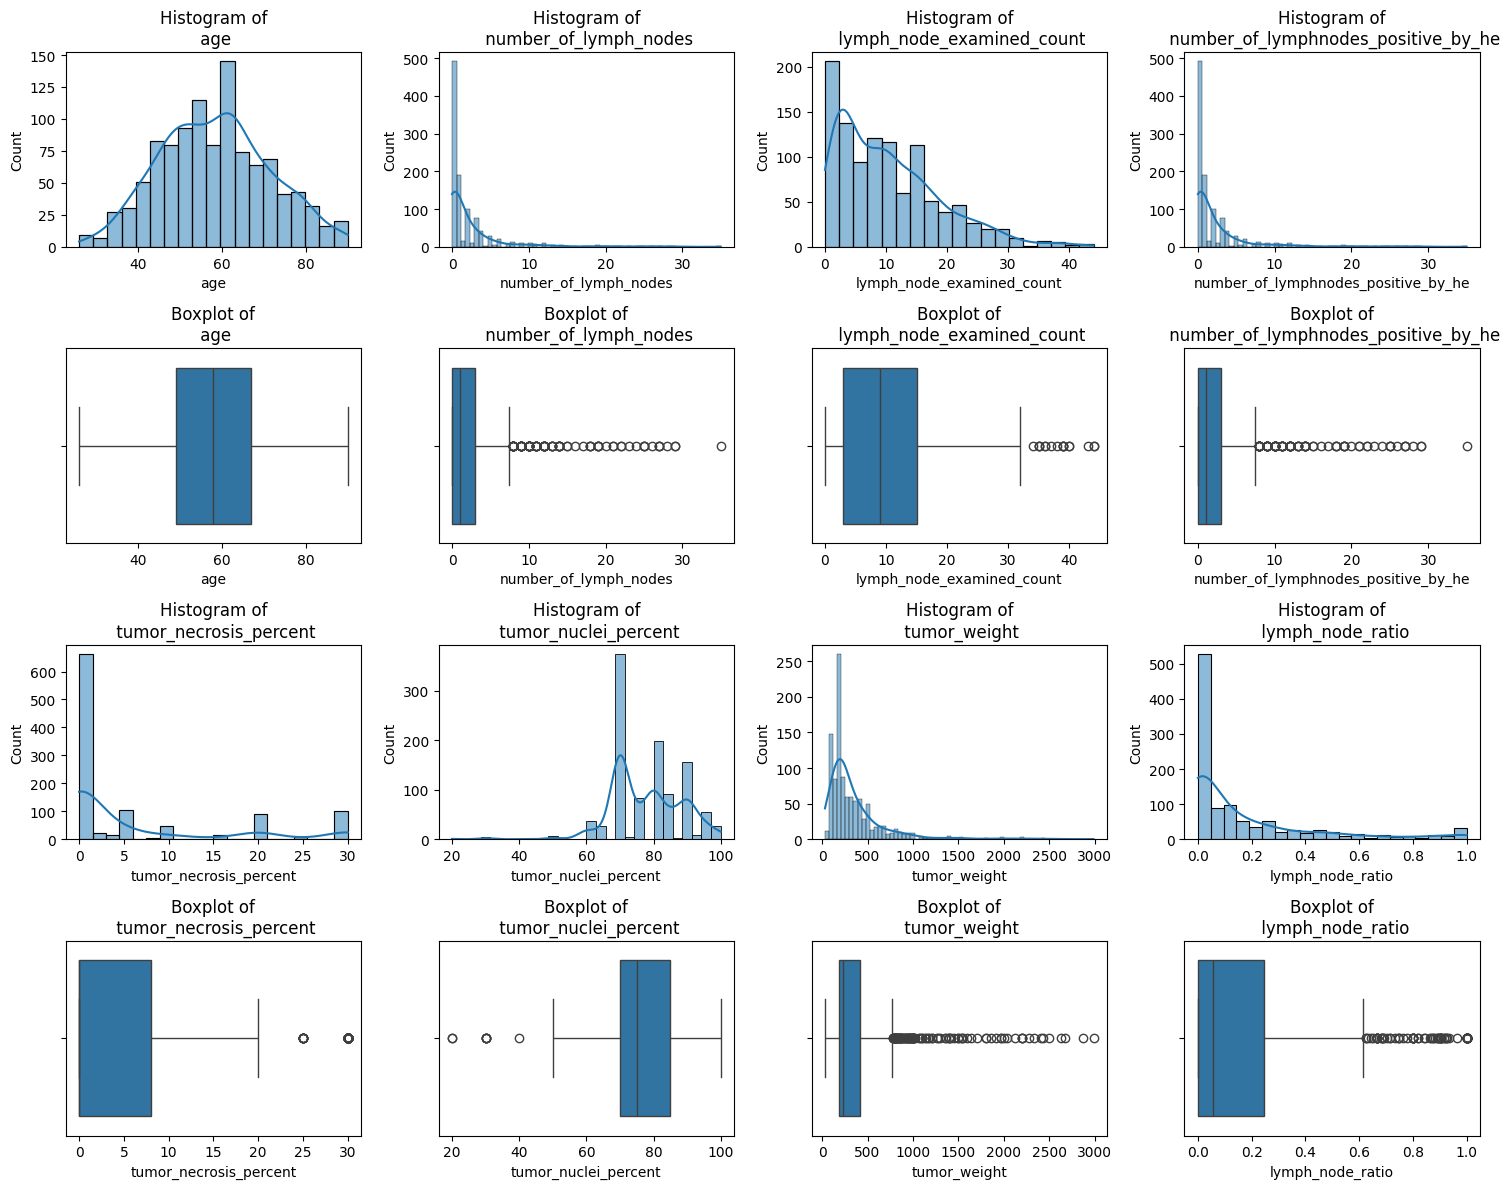

In [ ]:
# Demographic features
# Define the number of columns for plots in one row
num_plots = 4

# Plot the first 8 features as example
data = num.iloc[:, :8]  #

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(data.shape[1] / num_plots) * 2

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows * 3))

for i, col in enumerate(data.columns):
    row = (i // num_plots) * 2
    col_index = i % num_plots
    sns.histplot(data[col], kde=True, ax=axs[row, col_index])
    sns.boxplot(x=data[col], ax=axs[row + 1, col_index])
    axs[row, col_index].set_title(f'Histogram of\n {col}')
    axs[row + 1, col_index].set_title(f'Boxplot of\n {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

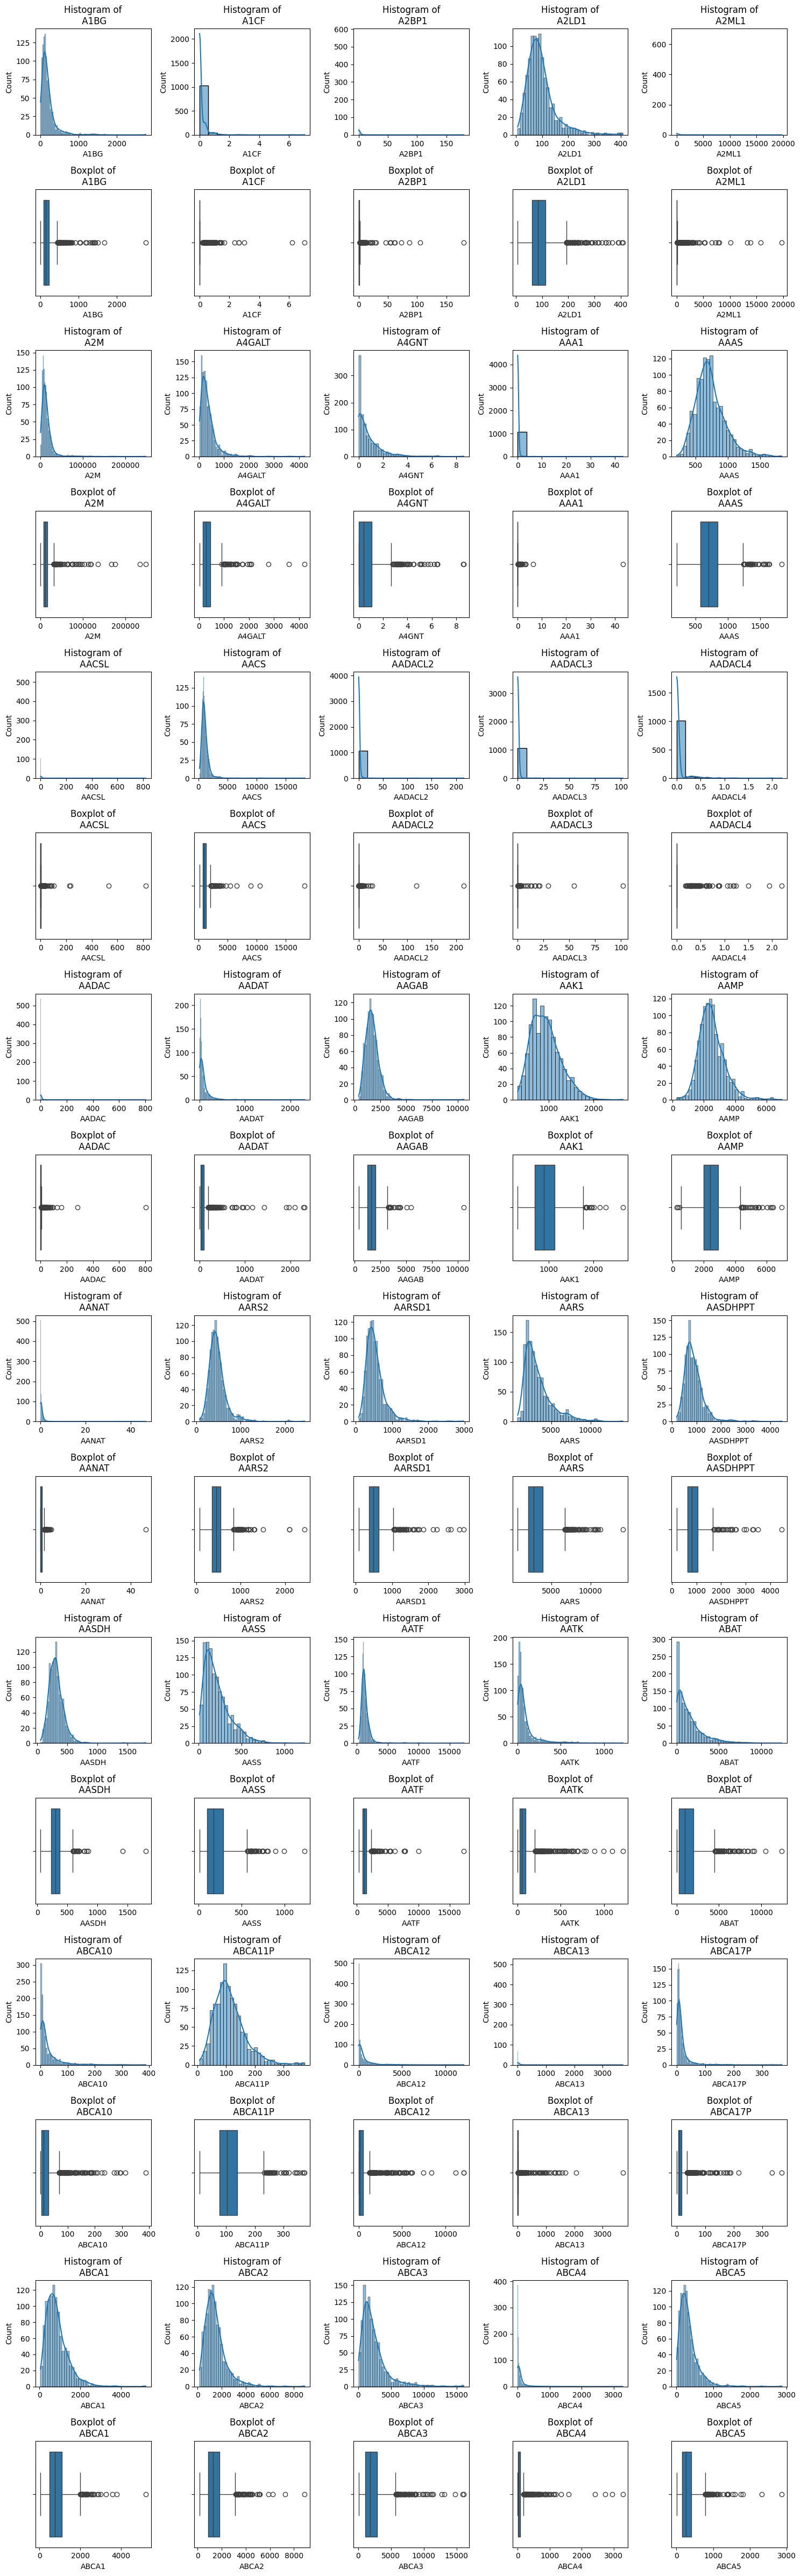

In [ ]:
# Gene expression features
# Define the number of columns for plots in one row
num_plots = 5

# Plot the first 40 features as example
data = num.iloc[:, 8:48]  #

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(data.shape[1] / num_plots) * 2

# Create subplots with specified number of rows and columns
fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows * 3))

for i, col in enumerate(data.columns):
    row = (i // num_plots) * 2
    col_index = i % num_plots
    sns.histplot(data[col], kde=True, ax=axs[row, col_index])
    sns.boxplot(x=data[col], ax=axs[row + 1, col_index])
    axs[row, col_index].set_title(f'Histogram of\n {col}')
    axs[row + 1, col_index].set_title(f'Boxplot of\n {col}')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

### Categorical features

In [ ]:
# Select specific columns from cat_cols
tem_cat = cat.iloc[:, [4, 19, 5, 6, 0, 1, 2, 3,  8, 9, 10, 11, 13,  17,  20]]
tem_cat_cols = tem_cat.columns

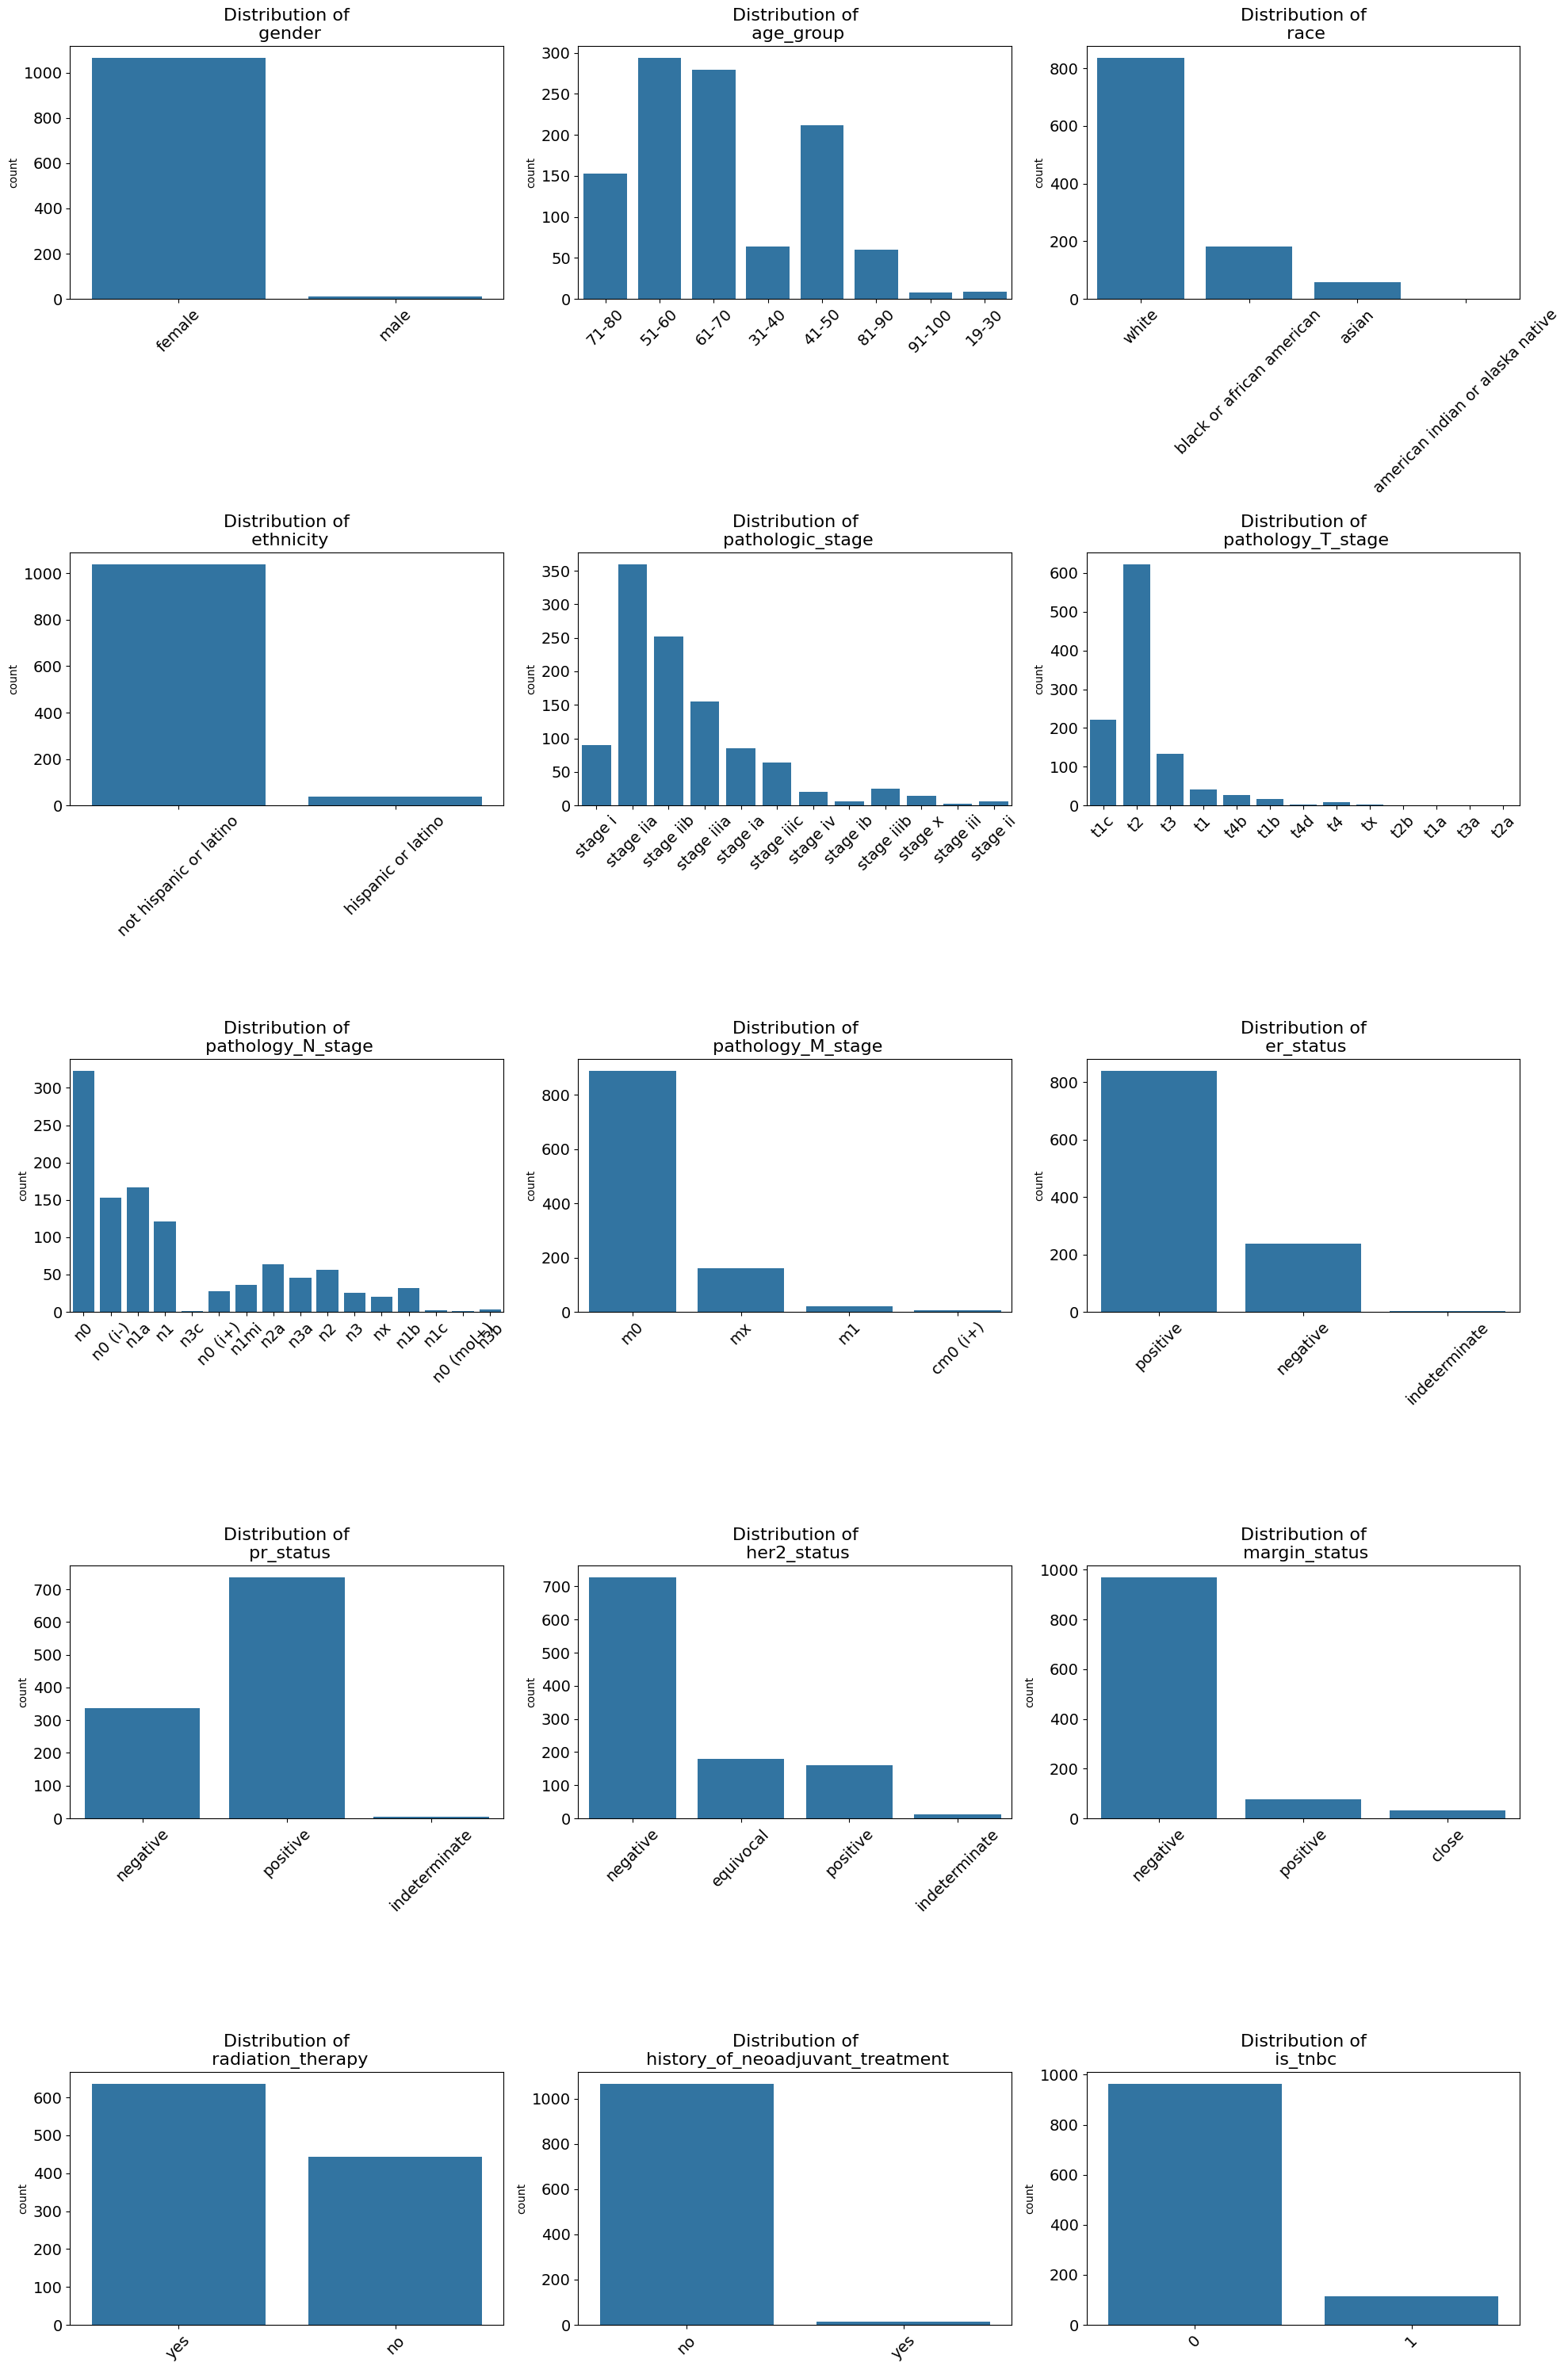

In [ ]:
# Number of plots in one row
num_plots = 3

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(tem_cat_cols) / num_plots)

# Create the subplots grid
fig, axs = plt.subplots(num_rows, num_plots, figsize=(20, num_rows * 6))

# Loop through each column to create count plots
for i, col_name in enumerate(tem_cat_cols):
    row = i // num_plots  # Determine the row index
    col = i % num_plots   # Determine the column index

    # Create a count plot
    sns.countplot(x=tem_cat_cols[i], data=cat, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of\n {tem_cat_cols[i]}', fontsize=16)

    # Rotate the x-axis labels if needed
    axs[row, col].tick_params(axis='x', rotation=45, labelsize=14)
    axs[row, col].tick_params(axis='y', labelsize=14)

    # Remove x label
    axs[row, col].set_xlabel('')

# Adjust subplot layout to avoid overlap
plt.tight_layout()  # Automatically adjust subplot parameters for a better fit
plt.subplots_adjust(hspace=1)  # Additional spacing between subplots

plt.show()  # Display the plot

In [ ]:
rest_cols = set(cat_cols).difference(set(tem_cat_cols))
rest_cols = list(rest_cols)
rest_cat_cols = cat[rest_cols].columns

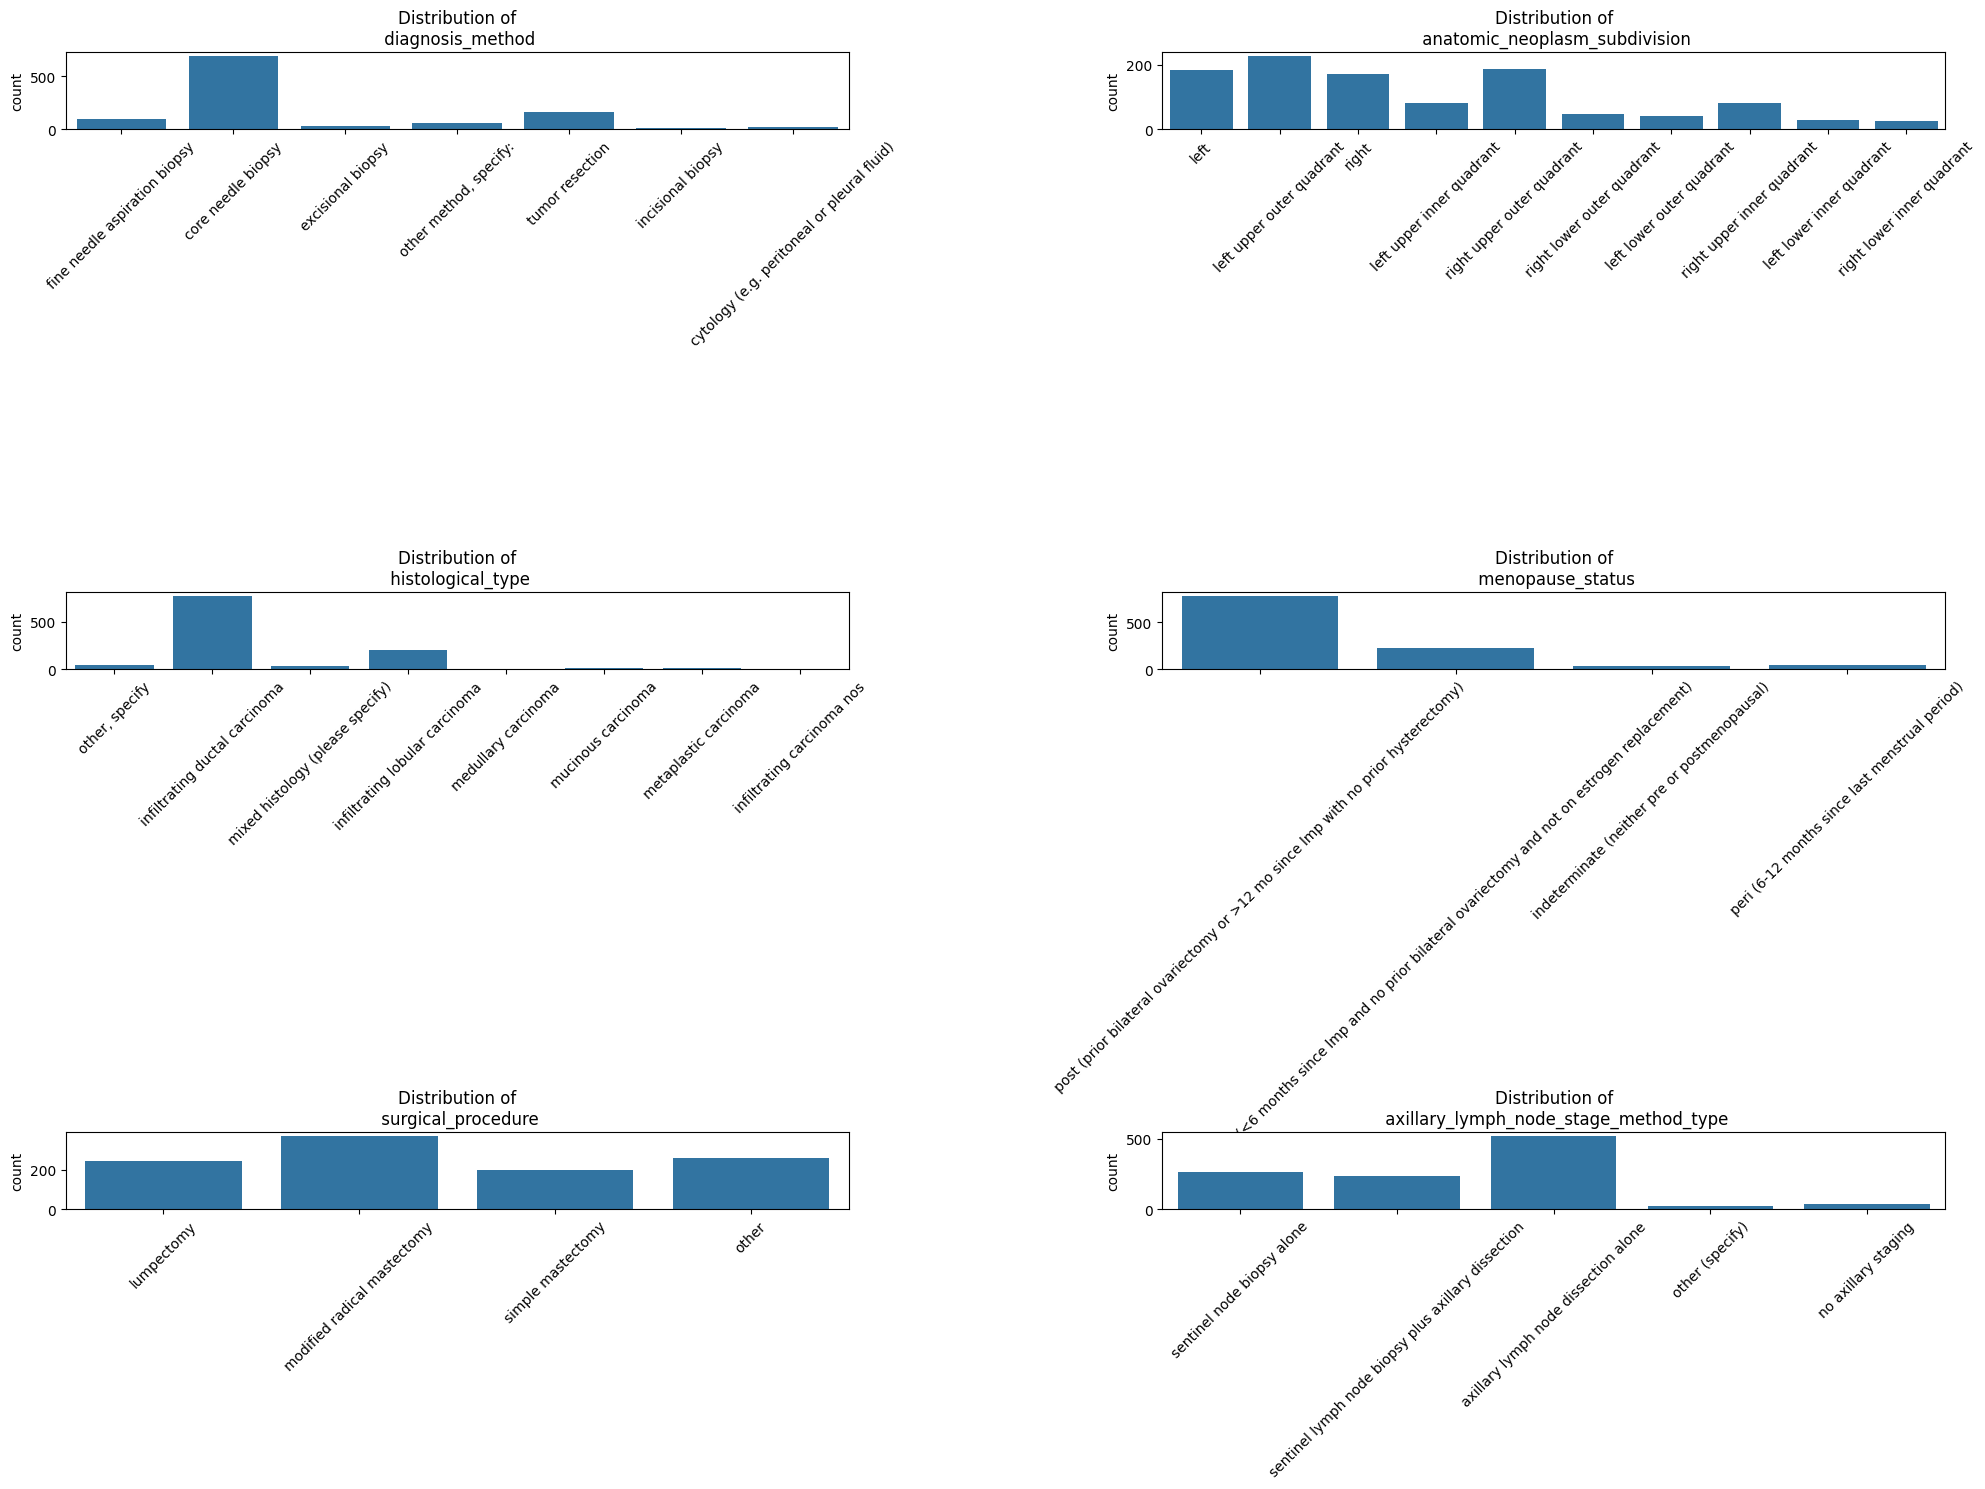

In [ ]:
# Number of plots in one row
num_plots = 2

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(rest_cat_cols) / num_plots)

# Create the subplots grid
fig, axs = plt.subplots(num_rows, num_plots, figsize=(30, num_rows * 5))

# Loop through each column to create count plots
for i, col_name in enumerate(rest_cat_cols):
    row = i // num_plots  # Determine the row index
    col = i % num_plots   # Determine the column index

    # Create a count plot
    sns.countplot(x=rest_cat_cols[i], data=cat, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of\n {rest_cat_cols[i]}')

    # Rotate the x-axis labels if needed
    axs[row, col].tick_params(axis='x', rotation=45)

    # Remove x label
    axs[row, col].set_xlabel('')

# Adjust subplot layout to avoid overlap
plt.tight_layout()  # Automatically adjust subplot parameters for a better fit
plt.subplots_adjust(hspace=6, wspace=0.4)  # Additional spacing between subplots

plt.show()  # Display the plot

<ipython-input-124-8f53a9dc831e>:26: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


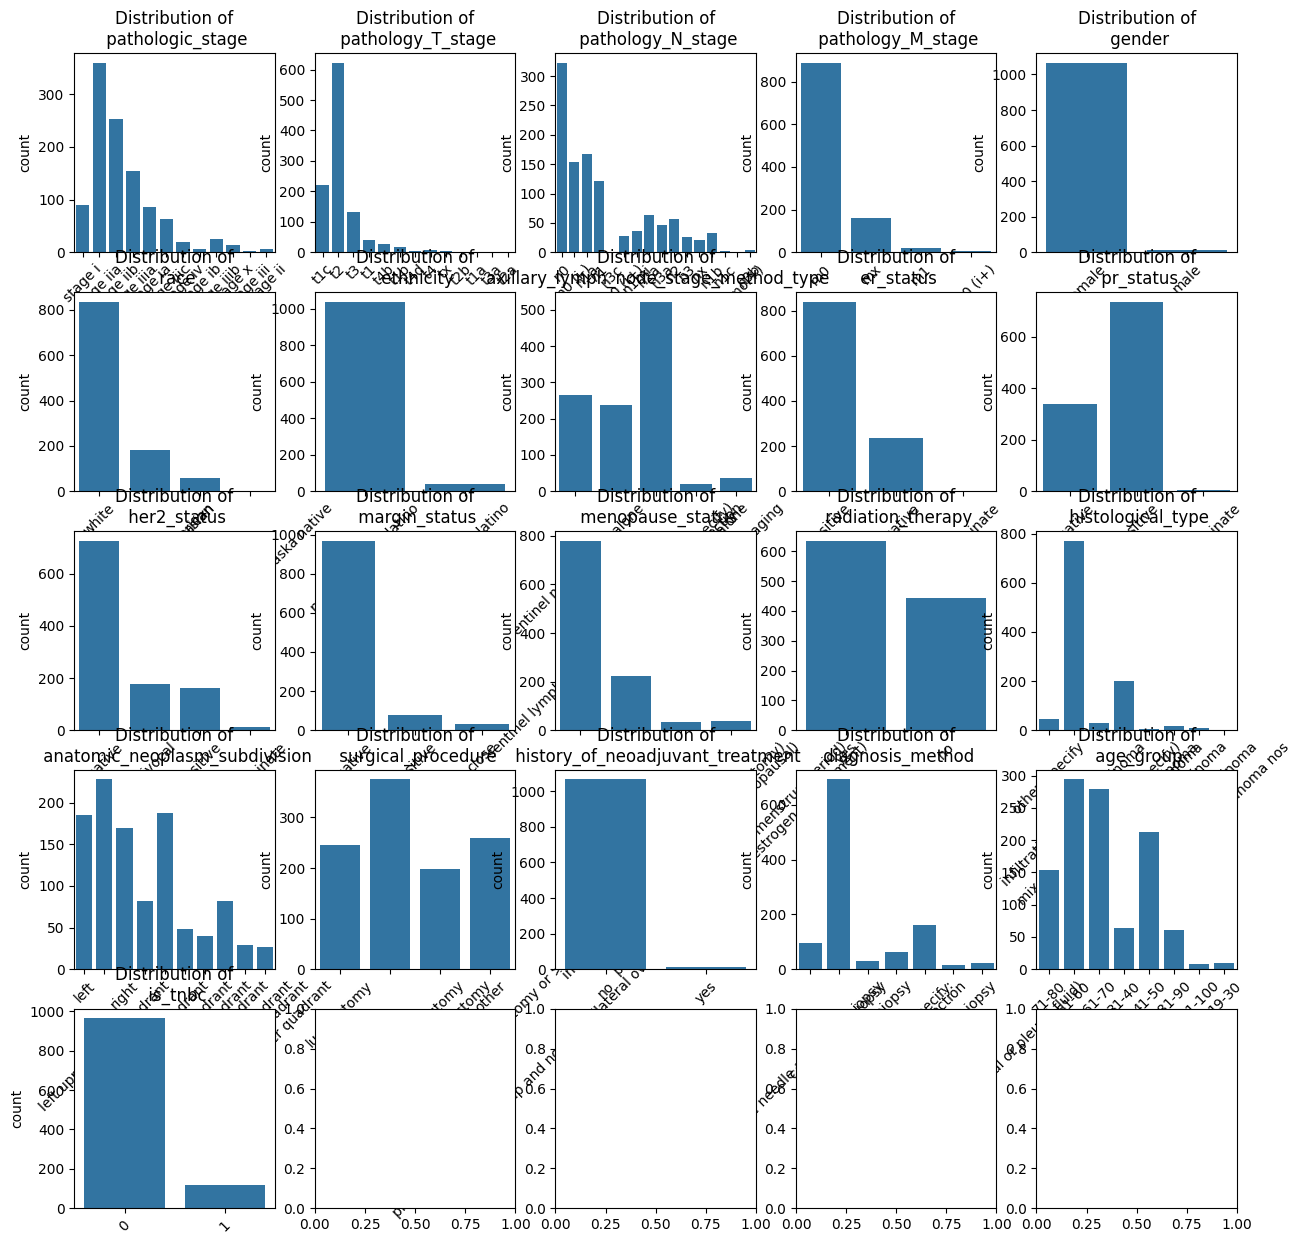

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

num_plots = 5  # Number of plots in 1 row

# Calculate the number of rows needed for the subplots
num_rows = math.ceil(len(cat_cols) / num_plots)

fig, axs = plt.subplots(num_rows, num_plots, figsize=(15, num_rows*3))

for i, col in enumerate(cat_cols):
    row = i // num_plots
    col = i % num_plots

    # Count plot
    sns.countplot(x=cat_cols[i], data=cat, ax=axs[row, col])
    axs[row, col].set_title(f'Distribution of\n {cat_cols[i]}')

    # Rotate x labels
    axs[row, col].tick_params(axis='x', rotation=45)

    # Remove x label
    axs[row, col].set_xlabel('')

plt.tight_layout()
plt.show()

### Time & Event

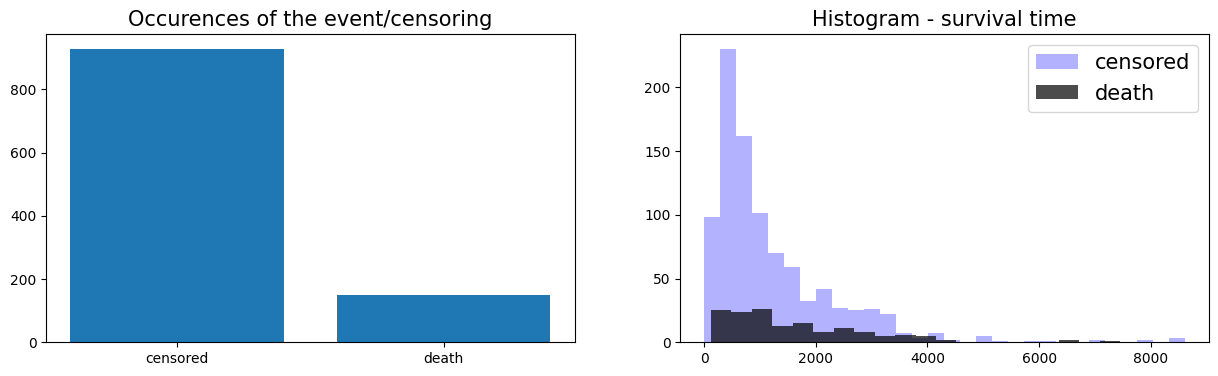

In [ ]:
from collections import Counter

# Creating an empty chart
fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))

# Counting the number of occurrences for each category
data = Counter(brca['status'].replace({0:'censored', 1:'death'}))
category = list(data.keys())
counts = list(data.values())
idx = range(len(counts))

# Displaying the occurrences of the event/censoring
ax1.bar(idx, counts)
ax1.set_xticks(idx)
ax1.set_xticklabels(category)
ax1.set_title( 'Occurences of the event/censoring', fontsize=15)

# Showing the histogram of the survival times for the censoring
time_0 = brca.loc[ brca['status'] == 0, 'time']
ax2.hist(time_0, bins=30, alpha=0.3, color='blue', label = 'censored')

# Showing the histogram of the survival times for the events
time_1 = brca.loc[ brca['status'] == 1, 'time']
ax2.hist(time_1, bins=20, alpha=0.7, color='black', label = 'death')
ax2.set_title( 'Histogram - survival time', fontsize=15)

# Displaying everything side-by-side
plt.legend(fontsize=15)
plt.show()

In [ ]:
n_censored = y.shape[0] - y["status"].sum()
print("%.1f%% of records are censored" % (n_censored / y.shape[0] * 100))

86.0% of records are censored


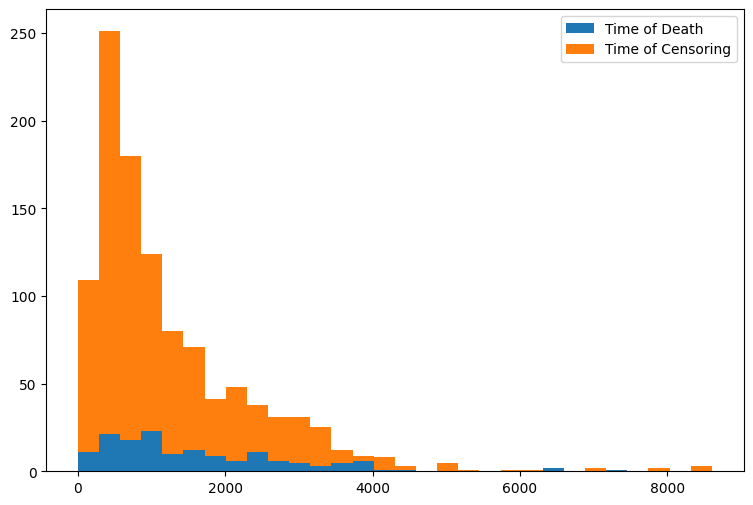

In [ ]:
plt.figure(figsize=(9, 6))
val, bins, patches = plt.hist((y["time"][y["status"] == 1], y["time"][y["status"] != 1]), bins=30, stacked=True)
plt.legend(patches, ["Time of Death", "Time of Censoring"])

### Correlations

In [ ]:
# Read the preprocessed file
brca = pd.read_csv('/content/drive/My Drive/3799_new/brca.csv')

In [ ]:
# corr = brca[features].corr()
corr = brca.corr()

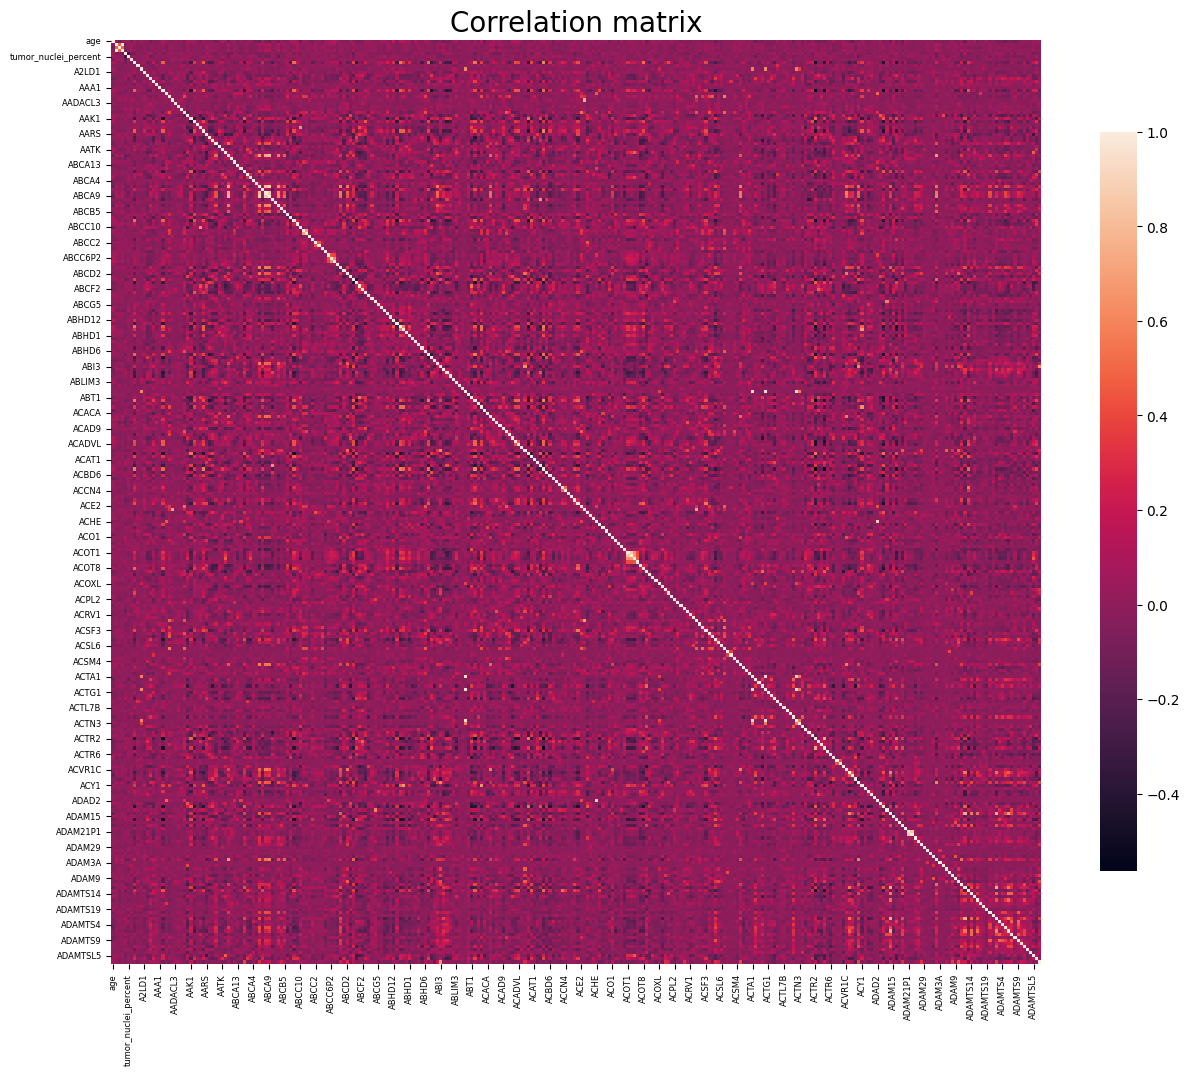

In [ ]:
# Take 300 features as example
plt.figure(figsize=(15, 12))
sns.heatmap(corr.iloc[2:300,2:300], annot=False, fmt=".2f", cbar_kws={"shrink": .8})
plt.title("Correlation matrix", fontsize=20)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

In [ ]:
threshold = 0.2

# Filter correlation values for variables highly correlated with "status" and "time"
status_corr = corr[(abs(corr['status']) > threshold) & (corr.index != 'status')][['status']]
time_corr = corr[(abs(corr['time']) > threshold) & (corr.index != 'time')][['time']]

# Rename columns
status_corr.columns = ['Correlation with Status']
time_corr.columns = ['Correlation with Time']

In [ ]:
status_corr[(status_corr.index != "status") & (status_corr.index != "time")]

In [ ]:
time_corr[(time_corr.index != "status") & (time_corr.index != "time")]

In [ ]:
threshold = 0.1

# Filter correlation values for variables highly correlated with "status" and "time"
status_corr = corr[(abs(corr['status']) > threshold) & (corr.index != 'status')][['status']]
time_corr = corr[(abs(corr['time']) > threshold) & (corr.index != 'time')][['time']]

# Rename columns
status_corr.columns = ['Correlation with Status']
time_corr.columns = ['Correlation with Time']

In [ ]:
status_corr[(status_corr.index != "status") & (status_corr.index != "time")]

In [ ]:
time_corr[(time_corr.index != "status") & (time_corr.index != "time")]

In [ ]:
feat_corr = corr.iloc[2:,2:]

In [ ]:
# Calculate correlation matrix
feat_corr = corr.iloc[2:, 2:]

# Find highly correlated features
corr_threshold = 0.8  # Adjust the threshold as needed

# Create a mask for highly correlated features
mask = np.abs(feat_corr) > corr_threshold
np.fill_diagonal(mask.values, False)

# Get indices of highly correlated features
row_indices, col_indices = np.where(mask)

# Remove one feature from each highly correlated pair
features_to_remove = set()
for i, j in zip(row_indices, col_indices):
    feature1, feature2 = feat_corr.columns[i], feat_corr.columns[j]
    if feature1 not in features_to_remove:
        features_to_remove.add(feature2)

# Remove highly correlated features from the dataset
brca_filtered = brca.drop(columns=features_to_remove)

In [ ]:
#print(brca.shape)
#print(brca_filtered.shape)

In [ ]:
# Save the DataFrame to a CSV file
# brca_filtered.to_csv('/content/drive/My Drive/3799_new/brca_filtered.csv', index=False)